In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


In [2]:
# Load MNIST data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize images to [0, 1] range
x_train = x_train / 255.0
x_test = x_test / 255.0

# Add a channel dimension for CNN
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes (digits 0-9)
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 45s 26ms/step - accuracy: 0.8961 - loss: 0.3453 - val_accuracy: 0.9820 - val_loss: 0.0643
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 26ms/step - accuracy: 0.9827 - loss: 0.0557 - val_accuracy: 0.9873 - val_loss: 0.0461
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 26ms/step - accuracy: 0.9902 - loss: 0.0320 - val_accuracy: 0.9902 - val_loss: 0.0375
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 84s 27ms/step - accuracy: 0.9923 - loss: 0.0229 - val_accuracy: 0.9913 - val_loss: 0.0348
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 79s 25ms/step - accuracy: 0.9945 - loss: 0.0164 - val_accuracy: 0.9873 - val_loss: 0.0433


In [5]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("✅ Test accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9828 - loss: 0.0536
✅ Test accuracy: 0.9871000051498413


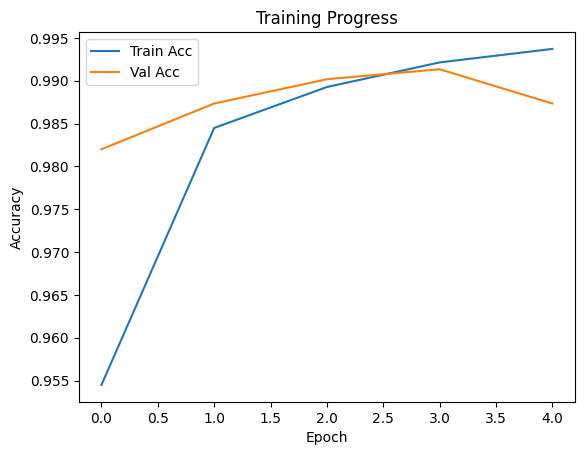

In [6]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training Progress')
plt.show()


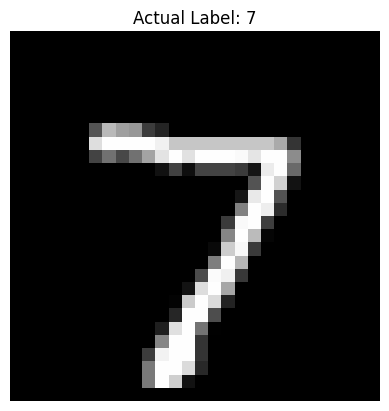

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step
🔮 Predicted Label: 7


In [7]:
import numpy as np

# Pick a test image
img = x_test[0]
plt.imshow(img.squeeze(), cmap='gray')
plt.title("Actual Label: {}".format(y_test[0]))
plt.axis('off')
plt.show()

# Make prediction
prediction = model.predict(img.reshape(1, 28, 28, 1))
print("🔮 Predicted Label:", np.argmax(prediction))
